## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [16]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [24]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [25]:

train, test = keras.datasets.cifar10.load_data()

In [32]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape(len(x), -1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1 :
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [33]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [34]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):

    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128, 64, 32, 16])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [35]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [36]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [37]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 16s 329us/step - loss: 2.0202 - acc: 0.2477 - val_loss: 1.8526 - val_acc: 0.3279
Epoch 2/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.7953 - acc: 0.3491 - val_loss: 1.7838 - val_acc: 0.3559
Epoch 3/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.6960 - acc: 0.3909 - val_loss: 1.6304 - val_acc: 0.4231
Epoch 4/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.6146 - acc: 0.4203 - val_loss: 1.6455 - val_acc: 0.4090
Epoch 5/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.5602 - acc: 0.4383 - val_loss: 1.5573 - val_acc: 0.4373
Epoch 6/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.5192 - acc: 0.4553 - val_loss: 1.5241 - val_acc: 0.4553
Epoch 7/100
5

50000/50000 [==============================] - 7s 139us/step - loss: 0.7328 - acc: 0.7356 - val_loss: 1.7038 - val_acc: 0.5118
Epoch 47/100
50000/50000 [==============================] - 28s 556us/step - loss: 0.7141 - acc: 0.7443 - val_loss: 1.7132 - val_acc: 0.5168
Epoch 48/100
50000/50000 [==============================] - 10s 206us/step - loss: 0.7068 - acc: 0.7473 - val_loss: 1.7049 - val_acc: 0.5191
Epoch 49/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.6800 - acc: 0.7558 - val_loss: 1.7372 - val_acc: 0.5093
Epoch 50/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.6653 - acc: 0.7598 - val_loss: 1.7781 - val_acc: 0.5183
Epoch 51/100
50000/50000 [==============================] - 7s 134us/step - loss: 0.6611 - acc: 0.7625 - val_loss: 1.7657 - val_acc: 0.5076
Epoch 52/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.6510 - acc: 0.7656 - val_loss: 1.8395 - val_acc: 0.5088
Epoch 53/100
50000/50000 [=====

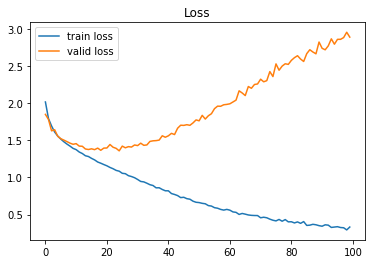

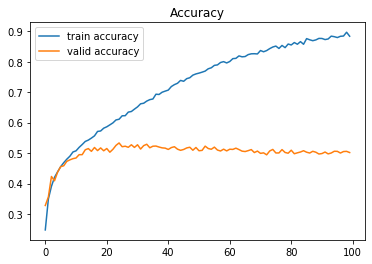

In [38]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()